# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 0.68938614,  0.27837959],
        [ 1.37430417, -0.03049   ],
        [-1.18989897, -0.78040507],
        [-0.38236936, -0.257802  ],
        [ 0.01842126,  0.56615754]]),
 array([1, 1, 0, 0, 1]))

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [26]:
# sampling
Y_generative = np.concatenate([np.ones(500), -np.ones(500)])
np.random.shuffle(Y_generative)

X_generative = np.zeros((Y_generative.shape[0], 2))
X_generative[Y_generative == 1, :] = np.random.multivariate_normal(m1, sigma, 500)
X_generative[Y_generative == -1, :] = np.random.multivariate_normal(m2, sigma, 500)

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [36]:
mod_a = LogisticRegression()
mod_a.fit(X_generative, Y_generative)

LogisticRegression()

In [44]:
mod_a.intercept_, mod_a.coef_

(array([-1.94606869]), array([[1.92659269, 1.85959808]]))

In [43]:
beta_0 = 0.5 * (
    m2.reshape(1, -1) @ np.linalg.inv(sigma) @ m2.reshape(-1, 1)
    - m1.reshape(1, -1) @ np.linalg.inv(sigma) @ m1.reshape(-1, 1)
)

beta_1 = (m1 - m2).reshape(1, -1) @ np.linalg.inv(sigma)

beta_0, beta_1

(array([[-2.]]), array([[2., 2.]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [87]:
# sampling
helper = np.random.binomial(1, 0.5, 1000)

X_disciminative = np.zeros((1000, 2))
X_disciminative[helper == 1] = np.random.multivariate_normal(m1, sigma, np.sum(helper))
X_disciminative[helper == 0] = np.random.multivariate_normal(m2, sigma, 1000 - np.sum(helper))
# X_disciminative = 0.5 * (
#     np.random.multivariate_normal(m1, sigma, 1000)
#     + np.random.multivariate_normal(m2, sigma, 1000)
# )

Y_discriminative = np.random.binomial(1, 1 / (1 + np.exp(2 - np.dot(np.array([[2, 2]]), X_disciminative.T))).flatten(), 1000)

In [88]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_disciminative, Y_discriminative)

LogisticRegression(penalty=None)

In [89]:
mod_b.intercept_, mod_b.coef_

(array([-1.94658085]), array([[2.05927202, 2.04509062]]))

#### Second bullet point

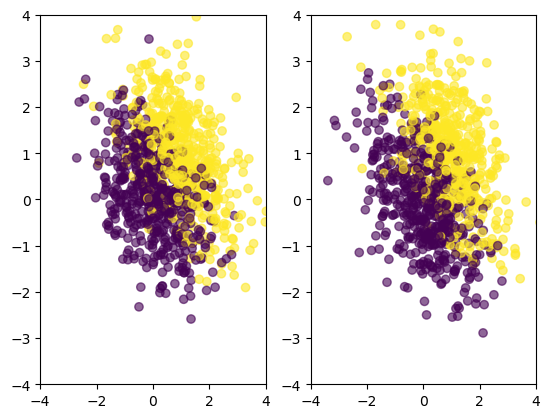

In [90]:
plt.subplot(1, 2, 1)
plt.scatter(x=X_generative[:, 0], y=X_generative[:, 1], c=Y_generative, alpha=0.6)
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.subplot(1, 2, 2)
plt.scatter(x=X_disciminative[:, 0], y=X_disciminative[:, 1], c=Y_discriminative, alpha=0.6)
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

![/Users/boro/Downloads/IMG_0259.jpeg](/Users/boro/Downloads/IMG_0259.jpeg)

![/Users/boro/Downloads/IMG_0260.jpeg](/Users/boro/Downloads/IMG_0260.jpeg)

In [100]:
# sampling

n1 = 1000
x1 = np.random.exponential(1, size=n1)

n2 = 2000
beta1 = 1
# x | y=-1 ~ Exp(beta1 + 1)
x2 = np.random.exponential(1 / (beta1 + 1), size=n2)

X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), -np.ones(n2)])

In [101]:
mod = LogisticRegression(penalty=None)
mod.fit(X, y)

mod.intercept_, mod.coef_

(array([-1.36939542]), array([[0.9835674]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

![/Users/boro/Downloads/IMG_0261.jpeg](/Users/boro/Downloads/IMG_0261.jpeg)

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [103]:
beta1 = 1
pi_c = n1/(n1 + n2)
beta0 = np.log(pi_c / ((1 - pi_c) * (1 + beta1)))

beta0

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)